In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import datetime
from matplotlib import pyplot as plt
from scipy. stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

# Чтение

In [2]:
df_test_analysis = pd.read_csv("../data/raw/diabetes_test_analysis.csv")
df_test_info = pd.read_csv("../data/raw/diabetes_test_info.csv")

df_train_analysis = pd.read_csv("../data/raw/diabetes_train_analysis.csv")
df_train_info = pd.read_csv("../data/raw/diabetes_train_info.csv")

# Проверка на дубли

In [3]:
print(f'Дубли df_test_analysis: {df_test_analysis.duplicated().sum()}')
print(f'Дубли df_test_info: {df_test_info.duplicated().sum()}')

print(f'Дубли df_train_analysis: {df_train_analysis.duplicated().sum()}')
print(f'Дубли df_train_info: {df_train_info.duplicated().sum()}')

Дубли df_test_analysis: 0
Дубли df_test_info: 0
Дубли df_train_analysis: 0
Дубли df_train_info: 0


# Проверка на наличие всех id для merge


In [4]:
print(df_train_analysis['id'].unique().shape[0])
print(df_train_info['id'].unique().shape[0])

print(df_test_analysis['id'].unique().shape[0])
print(df_test_info['id'].unique().shape[0])

60000
60000
10000
10000


Все `id` уникальны 

In [5]:
print(df_test_analysis.shape)
print(df_test_info.shape)

(10000, 9)
(10000, 5)


In [6]:
print(df_train_analysis.shape)
print(df_train_info.shape)

(60000, 9)
(60000, 5)


In [7]:
df_test = pd.merge(df_test_analysis, df_test_info, on="id")
df_train = pd.merge(df_train_analysis, df_train_info, on="id")

In [8]:
print(df_test.shape)
print(df_train.shape)

(10000, 13)
(60000, 13)


#   Анализ features

In [9]:
df_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,ket,age,height,weight,gender
0,62538,low,low,0,0,1,100/80,0,5.92,54,169,76.0,f
1,49159,low,low,0,0,1,120/82,0,3.82,49,165,65.0,m
2,60683,low,low,0,0,1,120/80,0,5.05,21962,170,56.0,m
3,42924,low,low,0,0,0,120\80,0,3.43,20287,169,62.0,m
4,52888,low,low,0,0,0,120/80,0,4.99,16202,166,67.0,male


In [10]:
df_test.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,ket,age,height,weight,gender
0,95306,low,medium,0,0,0,120/80,1,4.86,61,165,90.0,f
1,86688,low,low,0,0,1,100\70,0,4.89,14582,162,50.0,m
2,98038,low,low,0,0,0,140/100,1,3.91,23389,156,74.0,m
3,88694,low,low,0,0,1,120\90,0,4.05,47,162,89.0,m
4,92856,low,low,0,0,0,130\80,0,5.35,18388,162,72.0,f


In [11]:
df_train.dtypes

id               int64
cholesterol     object
gluc            object
smoke            int64
alco             int64
active           int64
pressure        object
diabetes         int64
ket            float64
age              int64
height           int64
weight         float64
gender          object
dtype: object

In [12]:
df_test.dtypes

id               int64
cholesterol     object
gluc            object
smoke            int64
alco             int64
active           int64
pressure        object
diabetes         int64
ket            float64
age              int64
height           int64
weight         float64
gender          object
dtype: object

- `id` — индекс строки в данных
- `сholesterol` — показатель холестерина в крови
- `gluc` — показатель глюкозы в крови
- `smoke` — курит или нет
- `alco` — употребляет алкоголь или нет
- `active` — активный или пассивный образ жизни
- `pressure` — возраст
- `ket` — медицинский показатель про кетоновые тела
- `age` — возраст
- `height` — рост (см)
- `weight` — вес (кг)
- `gender` — пол

**Целевым признаком является столбец `diabetes` — факт диабета**

In [13]:
def show_category_plot_count(data_df, column):
    plt.title(f'Распределение фичи - {column}')
    sns.countplot(data=data_df, x=column)
    plt.ylabel('Количество наблюдения')
    plt.xlabel('Значение фактора')
    plt.show()

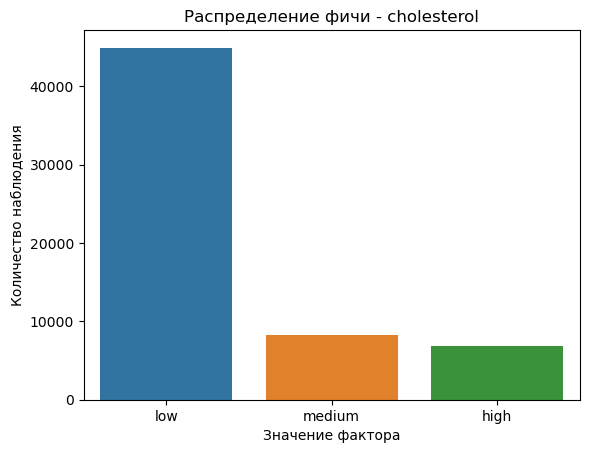

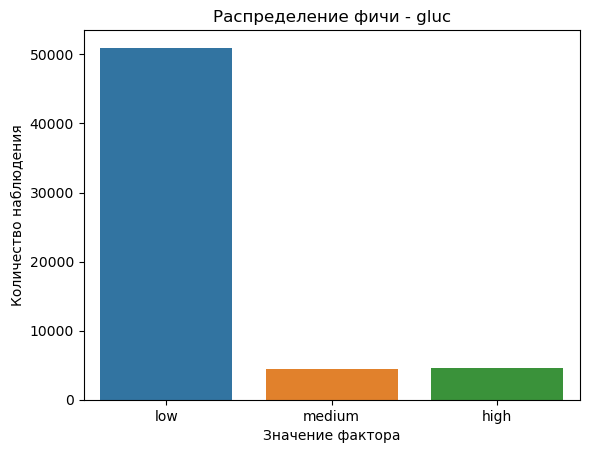

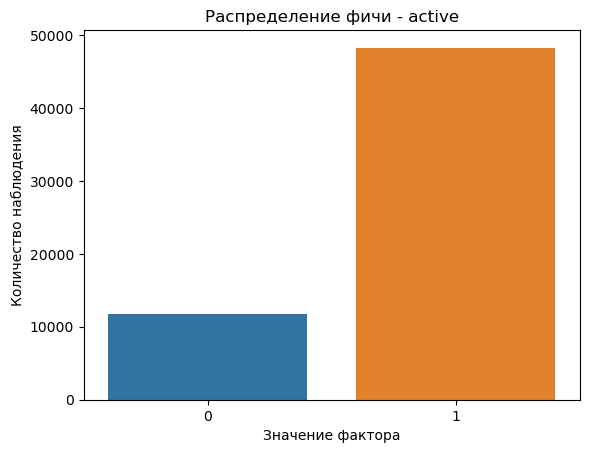

In [14]:
show_category_plot_count(df_train, 'cholesterol')
show_category_plot_count(df_train, 'gluc')
show_category_plot_count(df_train, 'active')

In [15]:
def show_category_plot_count_hue_target(df, column):
    plt.title(f'Распределение фичи - {column}')
    sns.countplot(data=df, x=column, hue='diabetes')
    plt.ylabel('Количество наблюдения')
    plt.xlabel(f'Значение фактора')
    plt.show()

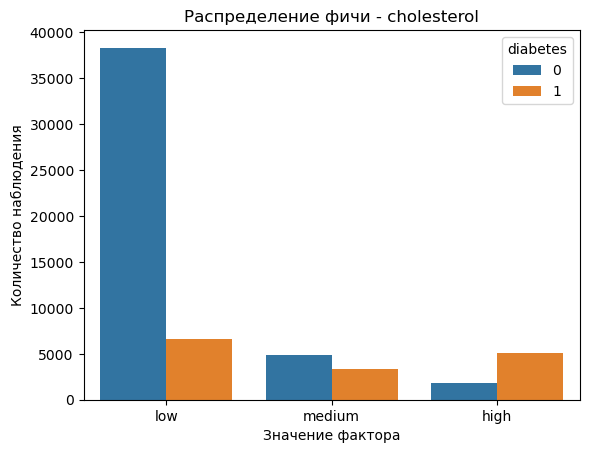

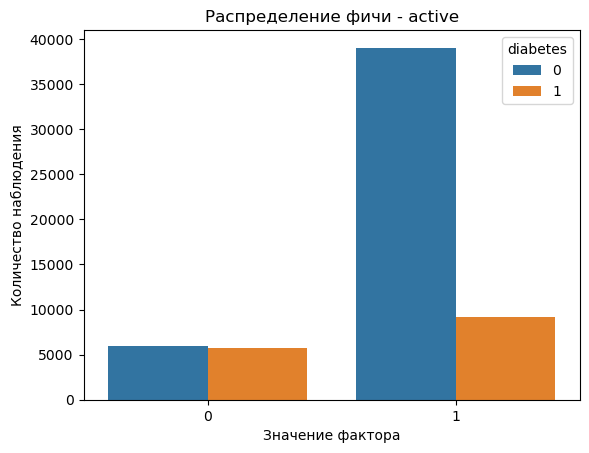

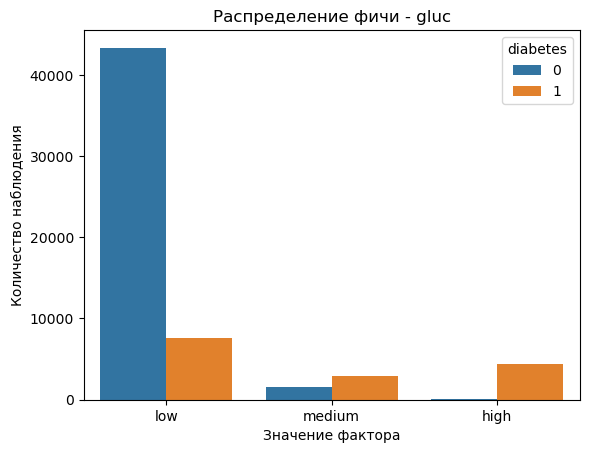

In [16]:
show_category_plot_count_hue_target(df_train, 'cholesterol')
show_category_plot_count_hue_target(df_train, 'active')
show_category_plot_count_hue_target(df_train, 'gluc')

In [17]:
df_train[['cholesterol']].value_counts()

cholesterol
low            44914
medium          8218
high            6868
dtype: int64

# Проверка на пропуски

In [18]:
print(df_train.isna().sum())
print()
print(df_test.isna().sum())

id                0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
pressure          0
diabetes          0
ket               0
age               0
height            0
weight         1998
gender            0
dtype: int64

id               0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
pressure         0
diabetes         0
ket              0
age              0
height           0
weight         320
gender           0
dtype: int64


Заполним пропуски констанстным значением = -100 -> нет значения

In [19]:
weight_na_const = -100

In [20]:
df_train['weight'].fillna(weight_na_const, inplace=True)
df_test['weight'].fillna(weight_na_const, inplace=True)

df_train_no_weight = df_train[df_train['weight'] == weight_na_const]
df_test_no_weight = df_test[df_test['weight'] == weight_na_const]
 
df_train.drop(df_train_no_weight.index, inplace = True)
df_test.drop(df_test_no_weight.index, inplace = True)

- **!df_train_no_weight!** - может использоваться для модели, где нет веса
- **!df_test_no_weight!** - может использоваться для модели, где нет веса

Колонка `id` не несет смысла смысловой нагрузки - спокойно удаляем

In [21]:
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

df_train_no_weight = df_train_no_weight.drop(['id'], axis=1)
df_test_no_weight = df_test_no_weight.drop(['id'], axis=1)

In [22]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,ket,age,height,weight,gender
0,low,low,0,0,1,100/80,0,5.92,54,169,76.0,f
1,low,low,0,0,1,120/82,0,3.82,49,165,65.0,m
2,low,low,0,0,1,120/80,0,5.05,21962,170,56.0,m
3,low,low,0,0,0,120\80,0,3.43,20287,169,62.0,m
4,low,low,0,0,0,120/80,0,4.99,16202,166,67.0,male


- Проверим колонки `сholesterol`, `gluc`, `smoke`, `alco`, `active`, `gender`

In [23]:
category_features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender']

In [24]:
for feature in category_features:
    print(feature ,df_train[feature].unique())

cholesterol ['low' 'medium' 'high']
gluc ['low' 'medium' 'high']
smoke [0 1]
alco [0 1]
active [1 0]
gender ['f' 'm' 'male' 'female']


In [25]:
for feature in category_features:
    print(feature ,df_test[feature].unique())

cholesterol ['low' 'high' 'medium']
gluc ['medium' 'low' 'high']
smoke [0 1]
alco [0 1]
active [0 1]
gender ['f' 'm' 'female' 'male']


- Закодируем поле `gender` без сохранения порядка

In [26]:
def code_gen(df):
    df.loc[df.gender.isin(['female', 'f']), 'gender'] = 0
    df.loc[df.gender.isin(['male', 'm']), 'gender'] = 1
    df['gender'] = df['gender'].astype(int)
    return df

In [27]:
df_train = code_gen(df_train)
df_test = code_gen(df_test)

df_train_no_weight = code_gen(df_train_no_weight)
df_test_no_weight = code_gen(df_test_no_weight)

- Закодируем поля `gluc`, `cholesterol` с сохранением их порядка

In [28]:
cholesterol_gluc_enc_dict = {'low':0, 'medium':1, 'high':2}

def code_gluc_chol(df):
    df['cholesterol'].replace(cholesterol_gluc_enc_dict, inplace=True)
    df['gluc'].replace(cholesterol_gluc_enc_dict, inplace=True)
    return df

In [29]:
df_train = code_gluc_chol(df_train)
df_test = code_gluc_chol(df_test)

df_train_no_weight = code_gluc_chol(df_train_no_weight)
df_test_no_weight = code_gluc_chol(df_test_no_weight)

In [30]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,ket,age,height,weight,gender
0,0,0,0,0,1,100/80,0,5.92,54,169,76.0,0
1,0,0,0,0,1,120/82,0,3.82,49,165,65.0,1
2,0,0,0,0,1,120/80,0,5.05,21962,170,56.0,1
3,0,0,0,0,0,120\80,0,3.43,20287,169,62.0,1
4,0,0,0,0,0,120/80,0,4.99,16202,166,67.0,1


`Допущение`: вычисление возраста от текущей даты

In [31]:
today = pd.Timestamp(datetime.date.today())

then = datetime.datetime(2012, 3, 5, 23, 8, 15)     

print(today)

duration = today - then                         
duration_in_s = duration.total_seconds()
years = divmod(duration_in_s, 31536000)[0]

print(years)

2023-10-02 00:00:00
11.0


Возникает неоднозначность в интерпретации если идти слева или справа:
Пример - `21109`
- `21-01-2009` — слева
- `02-11-2009` — спарва

Скорее всего это количество дней жизни человека

In [32]:
def get_age(x):
    x = str(x)
    if len(x) < 5:
        return int(x)
    else:
        res = int(round(int(x) / 365))
        
    #print(f'in: {x}, convert: {res}')
    return res

In [33]:
df_train['age'] = df_train['age'].apply(get_age)
df_test['age'] = df_test['age'].apply(get_age)

df_train_no_weight['age'] = df_train_no_weight['age'].apply(get_age)
df_test_no_weight['age'] = df_test_no_weight['age'].apply(get_age)

In [34]:
def parse_pressure(df):
    pressure = df['pressure'].str.split(r'[^0-9a-zA-Z-]+', expand=True)
    
    df["high pressure"]= pressure[0].astype(int) 
    df["low pressure"]= pressure[1].astype(int) 
    
    df.drop(columns =['pressure'], inplace = True)
    return df

In [35]:
df_test = parse_pressure(df_test)
df_train = parse_pressure(df_train)

df_train_no_weight = parse_pressure(df_train_no_weight)
df_test_no_weight = parse_pressure(df_test_no_weight)

In [36]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,0,0,0,1,0,5.92,54,169,76.0,0,100,80
1,0,0,0,0,1,0,3.82,49,165,65.0,1,120,82
2,0,0,0,0,1,0,5.05,60,170,56.0,1,120,80
3,0,0,0,0,0,0,3.43,56,169,62.0,1,120,80
4,0,0,0,0,0,0,4.99,44,166,67.0,1,120,80


In [37]:
df_train['age'].describe()

count    58002.000000
mean        53.181994
std          6.780185
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

In [40]:
df_train['high pressure'].describe()

count    58002.000000
mean       128.695148
std        149.233670
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: high pressure, dtype: float64

In [41]:
df_train['high pressure'] = df_train['high pressure'].apply(lambda x: abs(x))
df_train_no_weight['high pressure'] = df_train_no_weight['high pressure'].apply(lambda x: abs(x))

Границы давления (человек живой) 
 - `high` Сталистическое: **80-200**
 - `low`  Диастолическое: **110-50**

In [42]:
df_drop = df_train[(df_train["high pressure"] >= 200) | (df_train["high pressure"] <= 80)]
df_drop.shape

(430, 13)

In [43]:
df_train.drop(df_drop.index, inplace = True)

In [44]:
df_drop = df_train_no_weight[(df_train_no_weight["high pressure"] >= 200) | (df_train_no_weight["high pressure"] <= 80)]
df_drop.shape

(8, 13)

In [45]:
df_train_no_weight.drop(df_drop.index, inplace = True)

In [46]:
df_train['low pressure'].describe()

count    57572.000000
mean        96.231189
std        186.746936
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: low pressure, dtype: float64

In [47]:
df_drop = df_train[(df_train["low pressure"] >= 110) | (df_train["low pressure"] <= 50)]
df_drop.shape

(1331, 13)

In [74]:
df_train.drop(df_drop.index, inplace = True)

In [48]:
df_drop = df_train_no_weight[(df_train_no_weight["low pressure"] >= 110) | (df_train_no_weight["low pressure"] <= 50)]
df_drop.shape

(43, 13)

In [49]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,0,0,0,1,0,5.92,54,169,76.0,0,100,80
1,0,0,0,0,1,0,3.82,49,165,65.0,1,120,82
2,0,0,0,0,1,0,5.05,60,170,56.0,1,120,80
3,0,0,0,0,0,0,3.43,56,169,62.0,1,120,80
4,0,0,0,0,0,0,4.99,44,166,67.0,1,120,80


In [50]:
perc = [0.009,0.01, 0.02, 0.03, 0.031, 0.035, 0.04,  0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97 ,0.99]

<AxesSubplot:xlabel='height', ylabel='weight'>

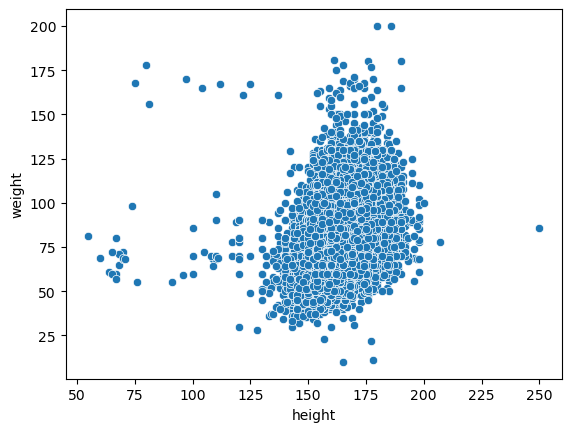

In [51]:
sns.scatterplot(x="height",y="weight",
        data=df_train)

<AxesSubplot:xlabel='age', ylabel='height'>

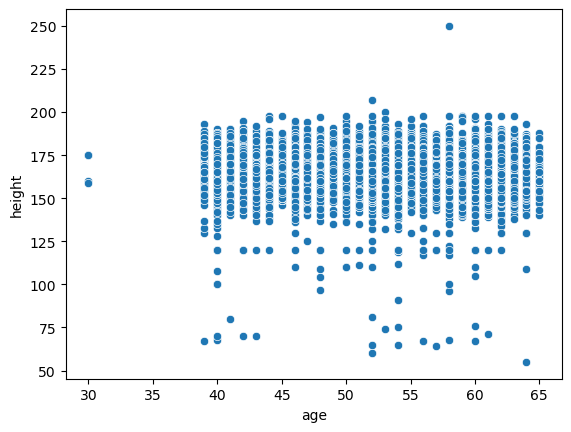

In [52]:
sns.scatterplot(x="age",
                    y="height",
                    data=df_train)

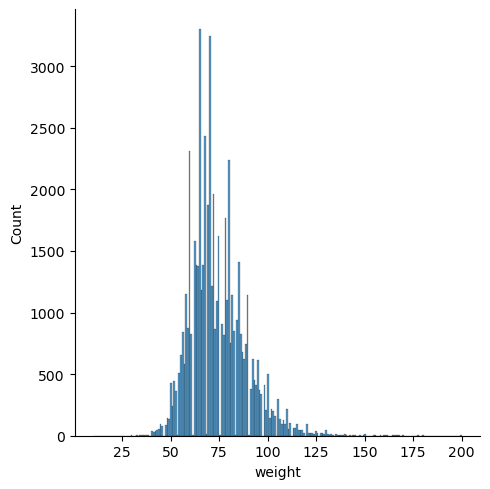

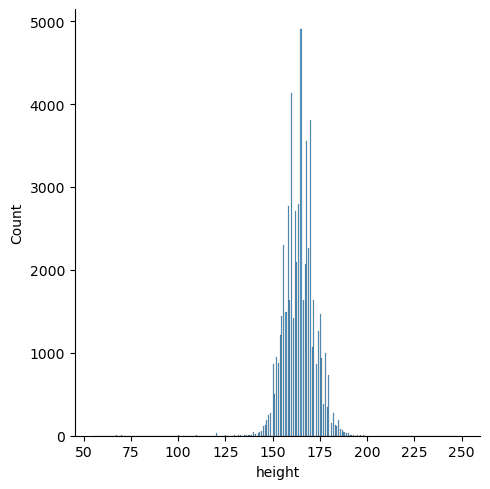

In [53]:
sns.displot(df_train['weight'])
sns.displot(df_train['height'])

In [54]:
df_train['age'].describe(percentiles=perc)

count    57572.000000
mean        53.182293
std          6.779773
min         30.000000
0.9%        39.000000
1%          39.000000
2%          40.000000
3%          40.000000
3.1%        40.000000
3.5%        40.000000
4%          40.000000
5%          41.000000
10%         43.000000
15%         45.000000
20%         47.000000
25%         48.000000
30%         50.000000
50%         54.000000
70%         58.000000
75%         58.000000
80%         60.000000
85%         60.000000
90%         62.000000
95%         64.000000
97%         64.000000
99%         64.000000
max         65.000000
Name: age, dtype: float64

In [55]:
df_train['height'].describe(percentiles=perc)

count    57572.000000
mean       164.315396
std          8.186726
min         55.000000
0.9%       146.000000
1%         147.000000
2%         149.000000
3%         150.000000
3.1%       150.000000
3.5%       150.000000
4%         151.000000
5%         152.000000
10%        155.000000
15%        156.000000
20%        158.000000
25%        159.000000
30%        160.000000
50%        165.000000
70%        168.000000
75%        170.000000
80%        170.000000
85%        172.000000
90%        175.000000
95%        178.000000
97%        180.000000
99%        184.000000
max        250.000000
Name: height, dtype: float64

In [56]:
df_train['weight'].describe(percentiles=perc)

count    57572.000000
mean        74.170328
std         14.580278
min         10.000000
0.9%        48.000000
1%          48.000000
2%          50.000000
3%          52.000000
3.1%        52.000000
3.5%        53.000000
4%          54.000000
5%          55.000000
10%         58.000000
15%         60.000000
20%         62.000000
25%         65.000000
30%         65.000000
50%         71.000000
70%         80.000000
75%         82.000000
80%         85.000000
85%         89.000000
90%         93.000000
95%        100.000000
97%        105.000000
99%        118.000000
max        200.000000
Name: weight, dtype: float64

In [57]:
df_train.drop(df_train[(df_train["height"] == 250) | (df_train["height"] < 146)].index, inplace=True)
df_train.drop(df_train[(df_train["weight"] < 47)].index, inplace=True)

df_train_no_weight.drop(df_train_no_weight[(df_train_no_weight["height"] == 250) | (df_train_no_weight["height"] < 146)].index, inplace=True)

In [58]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,0,0,0,1,0,5.92,54,169,76.0,0,100,80
1,0,0,0,0,1,0,3.82,49,165,65.0,1,120,82
2,0,0,0,0,1,0,5.05,60,170,56.0,1,120,80
3,0,0,0,0,0,0,3.43,56,169,62.0,1,120,80
4,0,0,0,0,0,0,4.99,44,166,67.0,1,120,80


In [59]:
df_train.shape[0]

56757

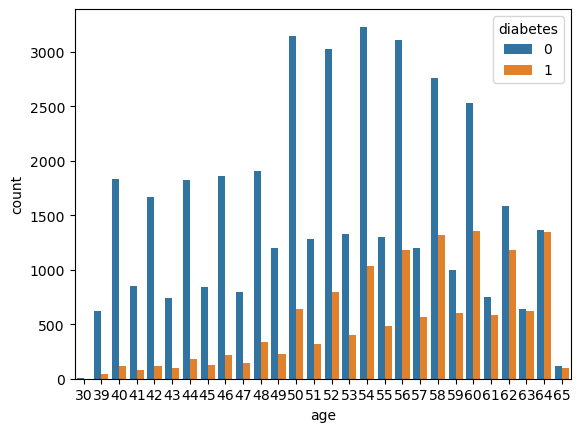

In [60]:
sns.countplot(x='age', hue='diabetes', data = df_train);

<AxesSubplot:>

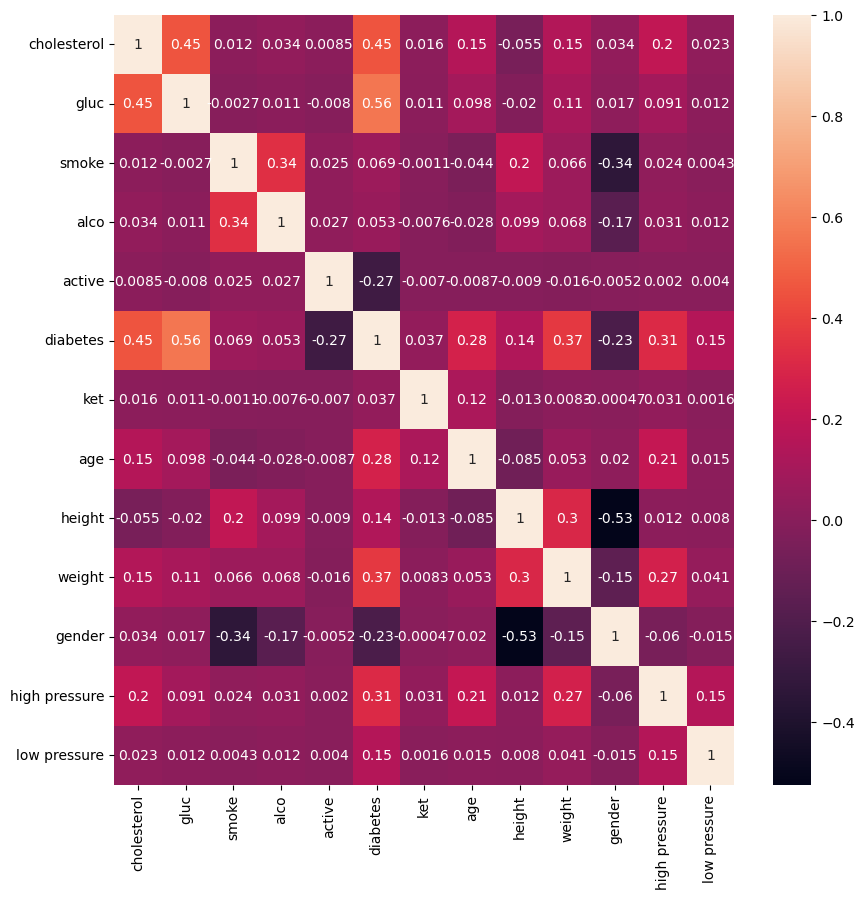

In [61]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot = True)

In [62]:
pearsonr(df_train['high pressure'], df_train['low pressure'])

PearsonRResult(statistic=0.1514996735589224, pvalue=1.5161701695391488e-288)

Так как p-value < 0.05 (типичное пороговое значение), то взаимосвязь:

- (high pressure, low pressure)

статистически значима.

In [63]:
df_train.dtypes

cholesterol        int64
gluc               int64
smoke              int64
alco               int64
active             int64
diabetes           int64
ket              float64
age                int64
height             int64
weight           float64
gender             int64
high pressure      int64
low pressure       int64
dtype: object

In [64]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,0,0,0,1,0,5.92,54,169,76.0,0,100,80
1,0,0,0,0,1,0,3.82,49,165,65.0,1,120,82
2,0,0,0,0,1,0,5.05,60,170,56.0,1,120,80
3,0,0,0,0,0,0,3.43,56,169,62.0,1,120,80
4,0,0,0,0,0,0,4.99,44,166,67.0,1,120,80


In [65]:
numeric = ['ket', 'age', 'height', 'weight', 'high pressure', 'low pressure']

def scale(df, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(df[numeric])
    new_df = scaler.transform(df[numeric])
    return new_df

In [66]:
df_train[numeric] = scale(df_train)
df_test[numeric] = scale(df_test)

df_train_no_weight[numeric] = scale(df_train_no_weight)
df_test_no_weight[numeric] = scale(df_test_no_weight)

In [67]:
df_train.head()

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,0,0,0,1,0,1.299965,0.121455,0.576698,0.108842,0,-1.628953,-0.087215
1,0,0,0,0,1,0,-1.153057,-0.617023,0.053203,-0.659374,1,-0.419596,-0.076565
2,0,0,0,0,1,0,0.283713,1.007628,0.707572,-1.287914,1,-0.419596,-0.087215
3,0,0,0,0,0,0,-1.608618,0.416846,0.576698,-0.868887,1,-0.419596,-0.087215
4,0,0,0,0,0,0,0.213626,-1.355501,0.184077,-0.519699,1,-0.419596,-0.087215


In [68]:
df_test.head()

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,1,0,0,0,1,0.124082,1.161299,0.074048,1.063822,0,-0.239697,-0.096371
1,0,0,0,0,1,0,0.159613,-1.958333,-0.287417,-1.636216,1,-0.896346,-0.151684
2,0,0,0,0,0,1,-1.001096,1.606960,-1.010348,-0.016193,1,0.416951,0.014254
3,0,0,0,0,1,0,-0.835280,-0.918456,-0.287417,0.996321,1,-0.239697,-0.041059
4,0,0,0,0,0,0,0.704436,-0.472794,-0.287417,-0.151195,0,0.088627,-0.096371


<AxesSubplot:ylabel='Frequency'>

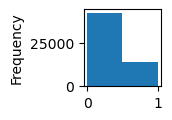

In [69]:
df_train['diabetes'].plot(kind ='hist', bins=2, figsize=(1,1))

Дисбаланс классов!

In [70]:
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled

In [71]:
features_train_upsampled, target_train_upsampled = upsample(df_train.loc[:, df_train.columns != 'diabetes'], 
                                                            df_train['diabetes'], 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1    0.572342
0    0.427658
Name: diabetes, dtype: float64
(99444,)


<AxesSubplot:ylabel='Frequency'>

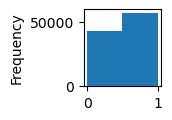

In [72]:
target_train_upsampled.plot(kind ='hist', bins=2, figsize=(1,1))

Выборка сбалансирована

In [73]:
features_train_upsampled['diabetes'] = target_train_upsampled

In [74]:
features_train_upsampled

,cholesterol,gluc,smoke,alco,active,ket,age,height,weight,gender,high pressure,low pressure,diabetes
3432,1,1,1,0,1,0.564058,0.416846,1.885435,1.365922,0,0.185082,-0.033964,1
41313,0,2,0,0,0,-0.604047,-1.650893,0.576698,1.226246,0,0.185082,-0.033964,1
34686,2,2,0,0,1,1.171473,0.416846,-1.124660,-1.008563,1,-0.419596,-0.087215,1
20867,2,2,0,0,0,1.825612,0.564541,-0.601165,-1.008563,1,0.185082,-0.087215,1
21671,0,0,0,0,0,0.272032,1.155324,-0.208544,1.784949,0,0.789761,-0.087215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,0,0,0,0,1,-0.685815,1.450715,0.969319,0.248517,0,-0.419596,-0.087215,0
861,0,0,0,0,0,0.423885,1.598411,0.053203,0.388193,1,-0.419596,-0.087215,1
3071,0,0,0,0,1,0.388842,0.416846,-0.732039,-0.170510,1,-0.721935,-0.087215,0
26568,0,0,0,1,0,-0.347064,0.121455,0.053203,1.016733,1,0.789761,-0.033964,1


In [75]:
df_test

,cholesterol,gluc,smoke,alco,active,diabetes,ket,age,height,weight,gender,high pressure,low pressure
0,0,1,0,0,0,1,0.124082,1.161299,0.074048,1.063822,0,-0.239697,-0.096371
1,0,0,0,0,1,0,0.159613,-1.958333,-0.287417,-1.636216,1,-0.896346,-0.151684
2,0,0,0,0,0,1,-1.001096,1.606960,-1.010348,-0.016193,1,0.416951,0.014254
3,0,0,0,0,1,0,-0.835280,-0.918456,-0.287417,0.996321,1,-0.239697,-0.041059
4,0,0,0,0,0,0,0.704436,-0.472794,-0.287417,-0.151195,0,0.088627,-0.096371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0.538620,-0.175686,0.435513,0.253811,1,-0.239697,-0.096371
9996,1,0,0,0,1,0,-0.586557,-0.175686,-0.528394,0.321311,1,-0.239697,-0.096371
9997,0,0,1,1,1,0,-0.385209,0.269975,2.965771,-0.151195,0,0.088627,-0.096371
9998,0,0,0,0,1,0,0.218833,-0.175686,-0.648883,-0.623702,1,-0.239697,-0.096371


In [76]:
df_test_target = df_test['diabetes']
df_test_features = df_test.drop(['diabetes'], axis=1)

df_train_target = features_train_upsampled['diabetes']
df_train_features = features_train_upsampled.drop(['diabetes'], axis=1)

df_test_no_weight_target = df_test_no_weight['diabetes']
df_test_no_weight_features = df_test_no_weight.drop(['diabetes'], axis=1)

df_train_no_weight_target = df_train_no_weight['diabetes']
df_train_no_weight_features = df_train_no_weight.drop(['diabetes'], axis=1)

In [77]:
df_test_target.to_csv('../data/processed/test_target.csv', index=False)
df_test_features.to_csv('../data/processed/test_features.csv', index=False)

df_train_target.to_csv('../data/processed/train_target.csv', index=False)
df_train_features.to_csv('../data/processed/train_features.csv', index=False)

df_test_no_weight_target.to_csv('../data/processed/test_no_weight_target.csv', index=False)
df_test_no_weight_features.to_csv('../data/processed/test_no_weight_features.csv', index=False)

df_train_no_weight_target.to_csv('../data/processed/train_no_weight_train.csv', index=False)
df_train_no_weight_features.to_csv('../data/processed/train_no_weight_features.csv', index=False)